<a href="https://colab.research.google.com/github/1doshi/nir/blob/main/Classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model training

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


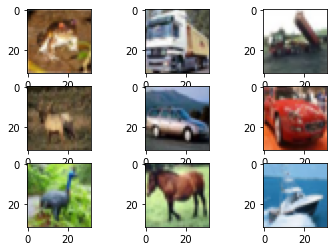

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

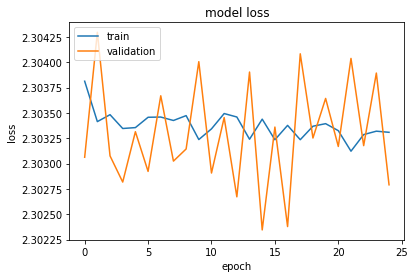

Accuracy on test data: 9.84%


In [5]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from matplotlib import pyplot

# Set seed for repeatable results
np.random.seed(42)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# Visualize the data
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

# Batch size
batch_size = 32

# Number of images classes
nb_classes = 10

# Number of epoch to train
nb_epoch = 25

# Image size
img_rows, img_cols = 32, 32

# The number of channels in the image: RGB
img_channels = 3

# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_train /= 255

# Convert tags to categories 
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### Create a sequential model
model = Sequential()
# First convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# First subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer: Dropout
model.add(Dropout(0.25))
# Third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Second subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer: Dropout
model.add(Dropout(0.25))
# The layer for converting data from a 2D representation to a flat one
model.add(Flatten())
# Fully connected classification layer
model.add(Dense(512, activation='relu'))
# Regularization layer: Dropout
model.add(Dropout(0.5))
# Output fully connected layer
model.add(Dense(nb_classes, activation='softmax'))

# Set optomization parameters
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Training model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

# Draw loss function for the train and validation data
def plotLosses(history):
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.title('model loss')
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'validation'], loc='upper left')
  pyplot.show()
plotLosses(history)

# We evaluate the quality of network training on test data
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Testing a trained network

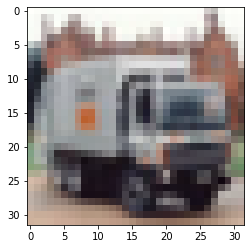

1/1 [==============================] - 0s 19ms/step
Predicted class:  airplane


In [7]:
# Take an arbitary index of the test sample
index_example = 11

# Load data
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

# Draw an example
pyplot.imshow(Xtest[index_example])
pyplot.show()

# Data test normalization
Xtest = Xtest.astype('float32')
Xtest /= 255

# Make a prediction
img = Xtest[index_example]
img = np.expand_dims(img, axis = 0)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
prediction = model.predict(img)
print('Predicted class: ', labels[np.argmax(prediction)])